In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparacion de datos

In [188]:
df_ratings = pd.read_csv('./rating_final.csv')
df_places = pd.read_csv('./geoplaces2.csv')

merged_places = df_places.drop_duplicates(subset=['placeID'])

datasets_locales = ['./chefmozaccepts.csv', './chefmozcuisine.csv', './chefmozhours4.csv', './chefmozparking.csv']
for dataset in datasets_locales:
    df_temp = pd.read_csv(dataset)
    merged_places = pd.merge(merged_places, df_temp, on='placeID', how='left')
print(f"Shape del DataFrame original de locales: {merged_places.shape}")

merged_places.to_csv('./dataLocal.csv', sep=';', index=False)

datasets_locales = ['./chefmozaccepts.csv', './chefmozcuisine.csv', './chefmozhours4.csv', './chefmozparking.csv']
for dataset in datasets_locales:
    df_temp = pd.read_csv(dataset)
    df_places = pd.merge(df_places, df_temp, on='placeID', how='left')

df_places.to_csv('./dataLocal.csv', sep=';', index=False)

Shape del DataFrame original de locales: (901, 26)


In [189]:
userprofile_file = './userprofile.csv'
usercuisine_file = './usercuisine.csv'
userpayment_file = './userpayment.csv'

df_userprofile = pd.read_csv(userprofile_file, sep=',')
df_usercuisine = pd.read_csv(usercuisine_file, sep=',')
df_userpayment = pd.read_csv(userpayment_file, sep=',')

df_users = pd.merge(df_userprofile, df_usercuisine, on='userID', how='left')
df_users = pd.merge(df_users, df_userpayment, on='userID', how='left')

df_users = df_users.drop_duplicates(subset=['userID'])

df_users.to_csv('dataUser.csv', sep=';', index=False)

print(f"Shape del DataFrame original de usuarios: {df_users.shape}")

Shape del DataFrame original de usuarios: (138, 21)


In [190]:
ratings = df_users
locales = merged_places

In [191]:
print(ratings.columns)
print(locales.columns)

Index(['userID', 'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos',
       'birth_year', 'interest', 'personality', 'religion', 'activity',
       'color', 'weight', 'budget', 'height', 'Rcuisine', 'Upayment'],
      dtype='object')
Index(['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address',
       'city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services', 'Rpayment', 'Rcuisine', 'hours', 'days',
       'parking_lot'],
      dtype='object')


# EDA

## Usuarios

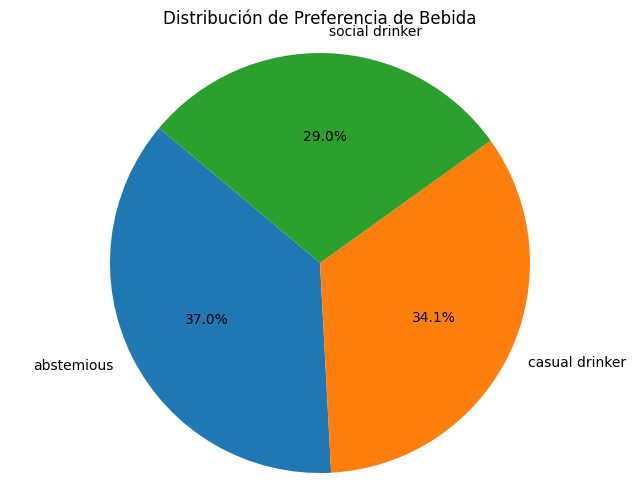

In [192]:
drink_counts = ratings['drink_level'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(drink_counts, labels=drink_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Preferencia de Bebida')
plt.axis('equal')  
plt.show()

/var/folders/22/kk3jgz8n1yn0zwh0vft67d040000gn/T/ipykernel_18994/3549005729.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




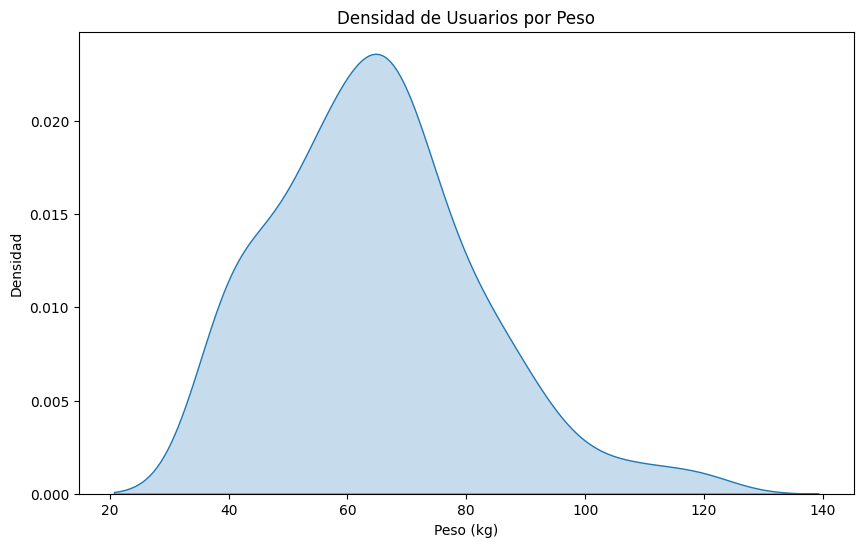

In [193]:
plt.figure(figsize=(10, 6))
sns.kdeplot(ratings['weight'], shade=True)
plt.title('Densidad de Usuarios por Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Densidad')
plt.show()

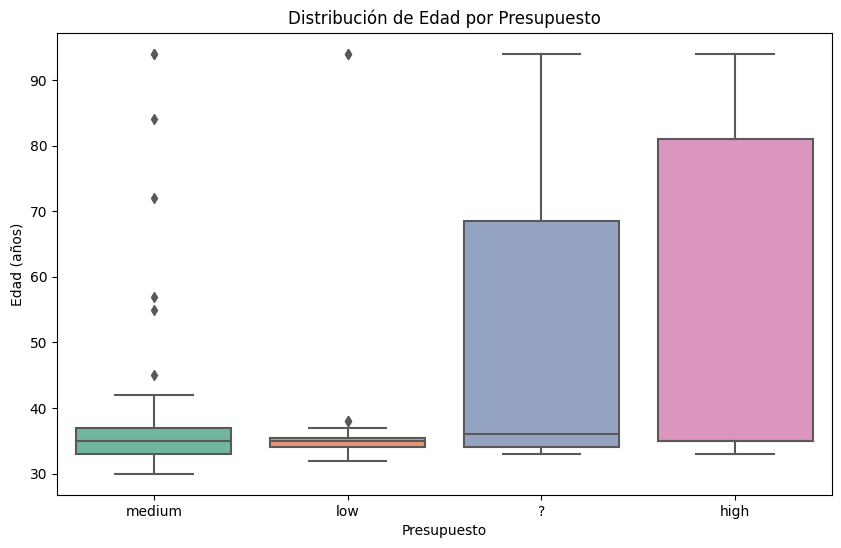

In [194]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ratings['budget'], y=2024 - ratings['birth_year'], palette='Set2')
plt.title('Distribución de Edad por Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Edad (años)')
plt.show()

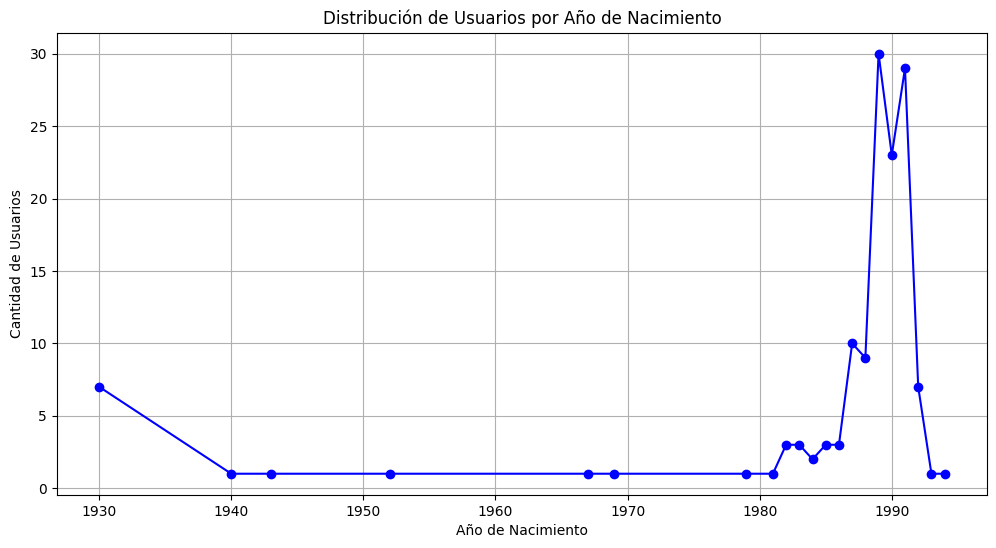

In [195]:
birth_year_counts = ratings['birth_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(birth_year_counts.index, birth_year_counts.values, marker='o', linestyle='-', color='b')
plt.title('Distribución de Usuarios por Año de Nacimiento')
plt.xlabel('Año de Nacimiento')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.show()

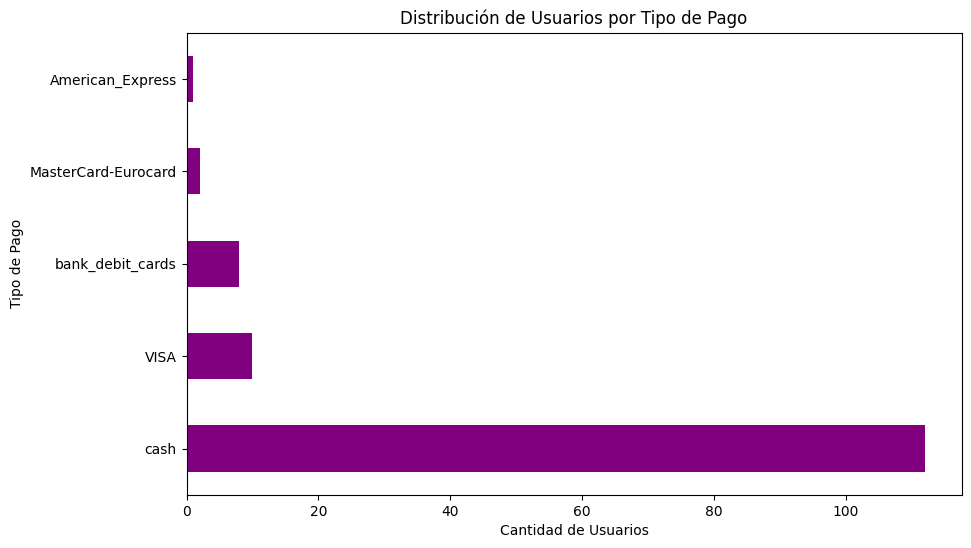

In [196]:
payment_counts = ratings['Upayment'].value_counts()

plt.figure(figsize=(10, 6))
payment_counts.plot(kind='barh', color='purple')
plt.title('Distribución de Usuarios por Tipo de Pago')
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('Tipo de Pago')
plt.show()

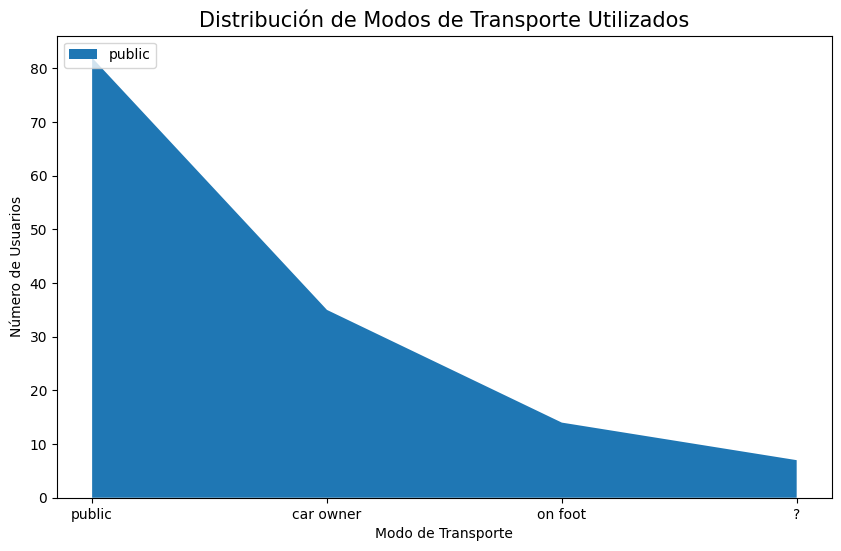

In [198]:
# Contar el número de usuarios por tipo de transporte
transport_counts = ratings['transport'].value_counts()

plt.figure(figsize=(10, 6))
plt.stackplot(transport_counts.index, transport_counts.values, labels=transport_counts.index)
plt.title('Distribución de Modos de Transporte Utilizados', size=15)
plt.xlabel('Modo de Transporte')
plt.ylabel('Número de Usuarios')
plt.legend(loc='upper left')
plt.show()

# Similitud del coseno